In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data = data[(data['Rooms'] > 0) & (data['Rooms'] < 6)]

In [4]:
data = data[(data['Square'] > 15) | (data['LifeSquare'] > 8) | (data['KitchenSquare'] > 2)]


In [5]:
data['Square'][(data['Square'] < 15) | data['Square'].isnull()] = data['LifeSquare'] * (data['Square'].mean() / data['LifeSquare'].mean())

In [6]:
data['LifeSquare'][(data['LifeSquare'] < 8) | data['LifeSquare'].isnull()] = data['Square'] * (data['LifeSquare'].mean() / data['Square'].mean())

In [7]:
data['KitchenSquare'][(data['KitchenSquare'] <= 2) | data['KitchenSquare'].isnull()] = data['Square'] * (data['KitchenSquare'].mean() / data['Square'].mean())

In [8]:
data = data[(data['Square'] > 15) & (data['Square'] < 200) & (data['KitchenSquare'] < 25) & (data['LifeSquare'] < 150)& (data['LifeSquare'] > 8) & (data['KitchenSquare'] > 2) & (data['HouseFloor'] < 60)]

In [9]:
data['LifeSquare'][data['LifeSquare'] > data['Square']] = data['Square'] - data['KitchenSquare']

#data[data['LifeSquare'] + data['KitchenSquare'] > data['Square']]


In [10]:
data['Square'][data['LifeSquare'] + data['KitchenSquare'] > data['Square']] = data['LifeSquare'] + data['KitchenSquare']

In [11]:
data = data[data['LifeSquare'] > data['KitchenSquare']]

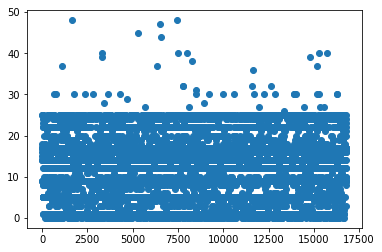

In [12]:
plt.scatter(data['Id'], data['HouseFloor'])

In [13]:
data['HouseFloor'][data['HouseFloor'] == 0] = data['HouseFloor'][data['HouseFloor'] != 0].mean()

In [14]:
data[data['HouseFloor'] < data['Floor']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,53.005165,8.949201,14,12.937811,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
14,10953,27,1.0,58.399471,52.408027,5.991444,5,4.000000,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.000000,6,5.000000,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2.0,64.711835,42.708710,7.210784,15,1.000000,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
26,4378,27,3.0,106.958871,70.591035,11.918335,17,12.937811,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936


In [15]:
data['HouseFloor'][data['HouseFloor'] < data['Floor']] = data['Floor']

/home/impactos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9.913000e+03,9913.000000,9913.000000,9913.000000,9913.000000,5170.000000,9913.000000,9913.000000,9913.000000
mean,8378.090992,50.447998,1.888228,56.430947,36.923293,7.554302,8.528700,13.540250,4.007659e+03,0.118919,24.735297,5360.607586,8.030969,1142.070213,1.320589,4.233128,213963.685768
std,4856.324837,43.650641,0.809682,18.656912,14.936384,2.400553,5.229519,5.748964,2.013782e+05,0.119129,17.522611,4004.453752,23.777922,1021.247681,1.491811,4.799724,92513.655636
min,0.000000,0.000000,1.000000,16.547242,8.547242,2.115367,1.000000,1.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.000000,20.000000,1.000000,41.983314,25.789141,5.780602,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153912.044504
50%,8391.000000,36.000000,2.000000,52.816344,33.739661,7.298238,7.000000,14.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192141.991858
75%,12585.000000,75.000000,2.000000,66.329140,45.054036,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249049.759069
max,16798.000000,209.000000,5.000000,198.930182,136.697187,23.000000,42.000000,48.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [17]:
data['Ecology_1'][data['Ecology_1'] == 0] = data['Ecology_1'].mean() * 1.05

In [18]:
data['Social_1'][data['Social_1'] == 0] = data['Social_1'].mean() * 1.02

In [19]:
data['Social_3'][data['Social_3'] == 0] = data['Social_3'].mean() * 1.2965

In [20]:
data = data.drop('Healthcare_1', axis=1)
data = data.drop('Helthcare_2', axis=1)

In [21]:
data['Ecology_2'][data['Ecology_2'] == 'A'] = 0
data['Ecology_2'][data['Ecology_2'] == 'B'] = 1
data['Ecology_3'][data['Ecology_3'] == 'A'] = 1
data['Ecology_3'][data['Ecology_3'] == 'B'] = 0
data['Shops_2'][data['Shops_2'] == 'A'] = 0
data['Shops_2'][data['Shops_2'] == 'B'] = 1

/home/impactos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/impactos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/impactos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [22]:
data[data['Ecology_2'] == 0].count()

Id               97
DistrictId       97
Rooms            97
Square           97
LifeSquare       97
KitchenSquare    97
Floor            97
HouseFloor       97
HouseYear        97
Ecology_1        97
Ecology_2        97
Ecology_3        97
Social_1         97
Social_2         97
Social_3         97
Shops_1          97
Shops_2          97
Price            97
dtype: int64

In [23]:
#data


In [24]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [25]:
train.shape

(6939, 18)

In [26]:
valid.shape

(2974, 18)

In [27]:
fts = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Shops_1', 'Shops_2']

In [28]:
#fts = ['Square', 'Rooms']

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(train.loc[:, fts], train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
pred = lr.predict(train.loc[:, fts])

In [32]:
pred

array([261923.26292896, 212156.15994732, 299937.01824489, ...,
       251974.47351814, 303475.53933909, 176706.33171699])

In [33]:
pred.shape

(6939,)

In [34]:
r2(train['Price'], pred)

0.5143156709879667

In [35]:
pred_valid = lr.predict(valid.loc[:, fts])

In [36]:
pred_valid.shape

(2974,)

In [37]:
r2(valid['Price'], pred_valid)

0.5297556913770802

In [38]:

### PАТО САМ        #      
#                            #       
##############################

In [39]:
test = pd.read_csv('test.csv')

In [40]:
test['Ecology_2'][test['Ecology_2'] == 'A'] = 0
test['Ecology_2'][test['Ecology_2'] == 'B'] = 1
test['Ecology_3'][test['Ecology_3'] == 'A'] = 1
test['Ecology_3'][test['Ecology_3'] == 'B'] = 0
test['Shops_2'][test['Shops_2'] == 'A'] = 0
test['Shops_2'][test['Shops_2'] == 'B'] = 1

#test = test[(test['Rooms'] > 0) & (test['Rooms'] < 6)]
#test = test[(test['Square'] > 15) | (test['LifeSquare'] > 8) | (test['KitchenSquare'] > 2)]
#test['Square'][(test['Square'] < 15) | test['Square'].isnull()] = test['LifeSquare'] * (test['Square'].mean() / test['LifeSquare'].mean())
#test['LifeSquare'][(test['LifeSquare'] < 8) | test['LifeSquare'].isnull()] = test['Square'] * (test['LifeSquare'].mean() / test['Square'].mean())
#test['KitchenSquare'][(test['KitchenSquare'] <= 2) | test['KitchenSquare'].isnull()] = data['Square'] * (test['KitchenSquare'].mean() / test['Square'].mean())
test = test[(test['Square'] > 15) & (test['Square'] < 200) & (test['KitchenSquare'] < 25) & (test['LifeSquare'] < 150)& (test['LifeSquare'] > 8) & (test['KitchenSquare'] > 2) & (test['HouseFloor'] < 60)]
#test['LifeSquare'][test['LifeSquare'] > test['Square']] = test['Square'] - test['KitchenSquare']
#test['Square'][test['LifeSquare'] + test['KitchenSquare'] > test['Square']] = test['LifeSquare'] + test['KitchenSquare']
#test = test[test['LifeSquare'] > test['KitchenSquare']]
#test['HouseFloor'][test['HouseFloor'] == 0] = test['HouseFloor'][test['HouseFloor'] != 0].mean()
#test['HouseFloor'][test['HouseFloor'] < test['Floor']] = test['Floor']
#data['Ecology_1'][data['Ecology_1'] == 0] = data['Ecology_1'].mean() * 1.05
#data['Social_1'][data['Social_1'] == 0] = data['Social_1'].mean() * 1.02
#data['Social_3'][data['Social_3'] == 0] = data['Social_3'].mean() * 1.2965

/home/impactos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/impactos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/impactos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [41]:
pred_test = lr.predict(test.loc[:, fts])

In [42]:
pred_test

array([184457.49213467, 271077.53308406, 198312.10158872, ...,
       234522.20221019, 129096.76676676, 355803.33115896])

In [43]:
test['Price'] = pred_test

In [44]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,0,11,2748,1,NaN,0,0,1,184457.492135
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,0,23,4583,3,NaN,3,3,1,271077.533084
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,1,0,46,7960,6,350.0,3,11,1,198312.101589
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,1,0,53,14892,4,NaN,1,4,1,354422.669969
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,1,0,5,1564,0,540.0,0,0,1,262554.359430


In [45]:
test.loc[:, ['Id', 'Price']].to_csv('salomatin_predictions.csv', index=None)